In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
voice = pd.read_csv('/Users/Pawan Kumar/Downloads/voice-classification.csv')

In [93]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [94]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [95]:
# voice.isnull().sum()

In [96]:
voice.label = voice.label.map({'male':1, 'female':0})

In [97]:
# sns.pairplot(voice.iloc[:, -5:-1], hue = 'label')

In [98]:
y = voice.label

In [99]:
x = voice.drop('label', axis =1)

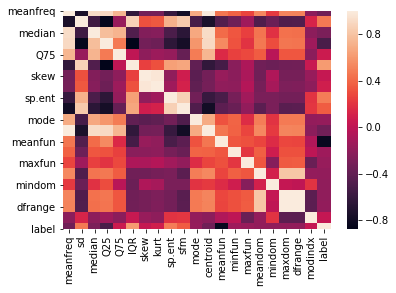

In [100]:
sns.heatmap(voice.corr())

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
stds = StandardScaler()
x = stds.fit_transform(x)

In [103]:
from sklearn.decomposition import PCA

In [119]:
pca = PCA(n_components=13,random_state=0)

In [120]:
x_pca = pd.DataFrame(pca.fit_transform(x,y))

In [121]:
x.shape

(3168, 20)

In [122]:
x_pca.shape

(3168, 13)

In [123]:
cum = np.cumsum(pca.explained_variance_ratio_.round(3))

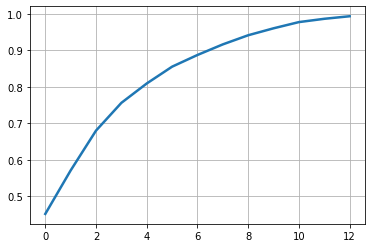

In [124]:
plt.figure(1, figsize=(6,4))
plt.clf()
plt.plot(cum, linewidth = 2.5)
plt.grid()


In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state =8380, test_size = 0.30)


In [132]:
from sklearn import metrics
def models(x_train, y_train):
#     logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(x_train, y_train)
    log_pred = log.predict(x_test)
    
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
    tree.fit(x_train, y_train)
    tree_pred = tree.predict(x_test)
    
    # Random forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion='entropy')
    forest.fit(x_train, y_train)
    forest_pred = forest.predict(x_test)
    
    # Accuracy 
    print("1.Accuracy of Logistic model is :", metrics.accuracy_score(y_test,log_pred).round(3))
    print('The confusion matrix is :', metrics.confusion_matrix(y_test, log_pred))
    print('R2 of Logistic regression model is :', metrics.r2_score(y_test, log_pred).round(3))
    print("2.Accuracy of Decision tree model is :", metrics.accuracy_score(y_test,tree_pred).round(3))
    print('The confusion matrix is :', metrics.confusion_matrix(y_test, tree_pred))
    print("3.Accuracy of Random Forest model is :", metrics.accuracy_score(y_test,forest_pred).round(3))
    print('The confusion matrix is :', metrics.confusion_matrix(y_test, forest_pred))
    
#     return log, tree, forest


In [133]:
models(x_train, y_train)

C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.Accuracy of Logistic model is : 0.974
The confusion matrix is : [[468  16]
 [  9 458]]
R2 of Logistic regression model is : 0.895
2.Accuracy of Decision tree model is : 0.933
The confusion matrix is : [[446  38]
 [ 26 441]]
3.Accuracy of Random Forest model is : 0.97
The confusion matrix is : [[473  11]
 [ 18 449]]


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [135]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

In [136]:
print("1.Accuracy of Logistic model is :", metrics.accuracy_score(y_test,gnb_pred).round(2))
print('The confusion matrix is :', metrics.confusion_matrix(y_test, gnb_pred))

1.Accuracy of Logistic model is : 0.95
The confusion matrix is : [[458  26]
 [ 26 441]]
